In [2]:
# Utilice este espacio para escribir el código.
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
#evaluaciones = pd.read_csv('Evaluaciones_Agropecuarias_Municipales_EVA.csv')
with open('../data/Evaluaciones_Agropecuarias_Municipales_EVA.csv', 'r', encoding='utf-8') as file:
    evaluaciones = pd.read_csv(file)
evaluaciones

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO


In [4]:
# Se muestran los tipos de datos de cada columna del conjunto de datos
evaluaciones.dtypes

CÓD. \nDEP.                                        int64
DEPARTAMENTO                                      object
CÓD. MUN.                                          int64
MUNICIPIO                                         object
GRUPO \nDE CULTIVO                                object
SUBGRUPO \nDE CULTIVO                             object
CULTIVO                                           object
DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO     object
AÑO                                                int64
PERIODO                                           object
Área Sembrada\n(ha)                                int64
Área Cosechada\n(ha)                               int64
Producción\n(t)                                    int64
Rendimiento\n(t/ha)                              float64
ESTADO FISICO PRODUCCION                          object
NOMBRE \nCIENTIFICO                               object
CICLO DE CULTIVO                                  object
dtype: object

In [5]:
# Verificar la cantidad de NaN en cada columna
nan_count = evaluaciones.isna().sum()

# Mostrar el resultado
print("Cantidad de NaN por columna:")
print(nan_count)

Cantidad de NaN por columna:
CÓD. \nDEP.                                         0
DEPARTAMENTO                                        0
CÓD. MUN.                                           0
MUNICIPIO                                           1
GRUPO \nDE CULTIVO                                  0
SUBGRUPO \nDE CULTIVO                               0
CULTIVO                                             0
DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO       0
AÑO                                                 0
PERIODO                                             0
Área Sembrada\n(ha)                                 0
Área Cosechada\n(ha)                                0
Producción\n(t)                                     0
Rendimiento\n(t/ha)                              3433
ESTADO FISICO PRODUCCION                            0
NOMBRE \nCIENTIFICO                              2857
CICLO DE CULTIVO                                    0
dtype: int64


In [6]:
# Muestra estadisticas del dataframe de evaluaciones agruapecarias de Colombia
evaluaciones.describe().T

,count,mean,std,min,25%,50%,75%,max
CÓD. \nDEP.,206068.0,40.322563,25.278662,5.00,17.0,41.0,68.00,99.0
CÓD. MUN.,206068.0,40747.534066,25256.621906,5001.00,17524.0,41357.0,68001.00,99773.0
AÑO,206068.0,2012.455976,3.479113,2006.00,2009.0,2013.0,2015.00,2018.0
Área Sembrada\n(ha),206068.0,291.073825,1153.602556,0.00,10.0,35.0,151.00,47403.0
Área Cosechada\n(ha),206068.0,249.419522,980.375226,0.00,8.0,30.0,130.00,38600.0
Producción\n(t),206068.0,2790.725595,45114.713321,0.00,32.0,140.0,648.00,4546116.0
Rendimiento\n(t/ha),202635.0,9.238820,14.888659,0.03,1.5,5.0,11.23,246.0


In [7]:
#Se realiza cambio en nombre de columnas para evitar el uso de signos de puntuación y caracteres no disponibles en un teclado en inglés
nuevos_nombres = {
    'CÓD.\nDEP.': 'CODIGO_DEPARTAMENTO',
    'DEPARTAMENTO': 'NOMBRE_DEPARTAMENTO',
    'CÓD. MUN.': 'CODIGO_MUNICIPIO',
    'MUNICIPIO': 'NOMBRE_MUNICIPIO',
    "GRUPO \nDE CULTIVO": 'GRUPO_CULTIVO',
    'SUBGRUPO \nDE CULTIVO': 'SUBGRUPO_CULTIVO',
    'CULTIVO': 'NOMBRE_CULTIVO',
    'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO': 'REGION_SISTEMA',
    'AÑO': 'ANIO',
    'PERIODO': 'PERIODO',
    "Área Sembrada\n(ha)": 'AREA_SIEMBRA_HA',
    "Área Cosechada\n(ha)": 'AREA_COSECHA_HA',
    'Producción\n(t)': 'PRODUCCION_TONELADAS',
    "Rendimiento\n(t/ha)": 'RENDIMIENTO_TONELADAS_HA',
    'ESTADO FISICO PRODUCCION': 'ESTADO_PRODUCCION',
    'NOMBRE \nCIENTIFICO': 'NOMBRE_CIENTIFICO',
    'CICLO DE CULTIVO': 'CICLO_CULTIVO'}
evaluaciones.rename(columns=nuevos_nombres, inplace=True)

In [8]:
evaluaciones

,CÓD. \nDEP.,NOMBRE_DEPARTAMENTO,CODIGO_MUNICIPIO,NOMBRE_MUNICIPIO,GRUPO_CULTIVO,SUBGRUPO_CULTIVO,NOMBRE_CULTIVO,REGION_SISTEMA,ANIO,PERIODO,AREA_SIEMBRA_HA,AREA_COSECHA_HA,PRODUCCION_TONELADAS,RENDIMIENTO_TONELADAS_HA,ESTADO_PRODUCCION,NOMBRE_CIENTIFICO,CICLO_CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO


In [9]:
evaluaciones = evaluaciones.replace(',','', regex=True)

In [10]:
evaluaciones['AREA_SIEMBRA_HA'] = evaluaciones['AREA_SIEMBRA_HA'].astype(float)
pivot = np.round(pd.pivot_table(evaluaciones,values='AREA_SIEMBRA_HA', index='GRUPO_CULTIVO', aggfunc='sum', fill_value=0))
pivot

,AREA_SIEMBRA_HA
GRUPO_CULTIVO,
CEREALES,14375721
FIBRAS,633056
FLORES Y FOLLAJES,30489
FORESTALES,550331
FRUTALES,4886242
HONGOS,18
HORTALIZAS,1014778
LEGUMINOSAS,2539762
OLEAGINOSAS,6163874


In [11]:
pivot['index_column'] = pivot.index

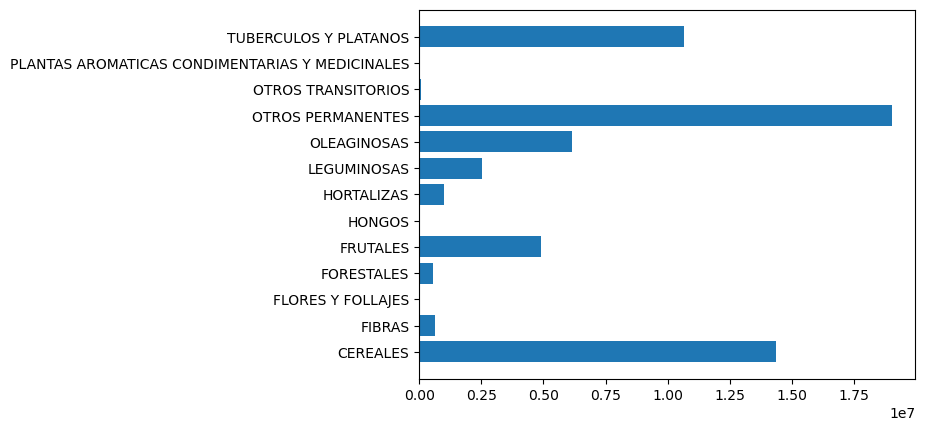

<Figure size 640x480 with 0 Axes>

In [12]:
plt.barh(pivot['index_column'], pivot['AREA_SIEMBRA_HA'])
plt.savefig('../Imagenes/grafico.png')
plt.show()
# Clear the current Matplotlib figure
plt.clf()

In [13]:
#Se cargan polígonos de los municipios de Colombia
municipios=gpd.read_file('../data/MunicipiosVeredas19MB.json')

In [14]:
#Se utiliza nunique para ver el nú,erp de municipios en el dataframe
municipios.nunique()

DPTOMPIO      1121
DPTO_CCDGO      33
MPIO_CCDGO     580
MPIO_CNMBR    1036
MPIO_CCNCT    1121
geometry      1121
dtype: int64

In [15]:
#Visualizamos el dataframe en una tabla
municipios

,DPTOMPIO,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CCNCT,geometry
0,05001,05,001,MEDELLÍN,05001,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351..."
1,05002,05,002,ABEJORRAL,05002,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026..."
2,05004,05,004,ABRIAQUÍ,05004,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877..."
3,05021,05,021,ALEJANDRÍA,05021,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469..."
4,05030,05,030,AMAGÁ,05030,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216..."
...,...,...,...,...,...,...
1116,97889,97,889,YAVARATÉ,97889,"POLYGON ((-69.99653 0.54682, -69.99598 0.54751..."
1117,99001,99,001,PUERTO CARREÑO,99001,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6..."
1118,99524,99,524,LA PRIMAVERA,99524,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472..."
1119,99624,99,624,SANTA ROSALÍA,99624,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669..."


<Axes: >

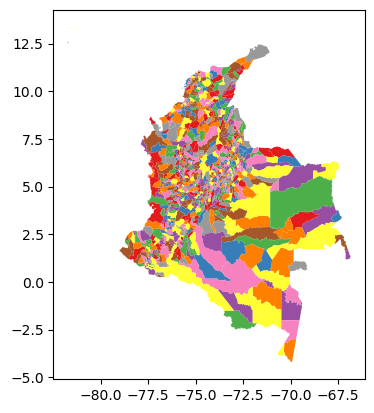

In [15]:
#Graficamos los municipios de colombia durante la exploración de la data
municipios.plot("MPIO_CNMBR", cmap="Set1")  

In [21]:
from sklearn.preprocessing import robust_scale

In [23]:
# Initialize KMeans instance
from sklearn.cluster import KMeans

In [24]:
evaluaciones2=evaluaciones[['CODIGO_MUNICIPIO', 'NOMBRE_CULTIVO']]
pivot = np.round(pd.pivot_table(evaluaciones2, index='CODIGO_MUNICIPIO',
                                columns='NOMBRE_CULTIVO', aggfunc= len, fill_value=0))
pivot.reset_index(inplace=True)
pivot['DPTOMPIO']=pivot['CODIGO_MUNICIPIO']

municipios=gpd.read_file('..\data\MunicipiosVeredas19MB.json')
municipios['DPTOMPIO']=municipios[['DPTOMPIO']].apply(pd.to_numeric)
municipios2=municipios[['DPTOMPIO','geometry']]
pivot = pivot.astype({'CODIGO_MUNICIPIO':'int'})
municipios3=pd.merge(municipios2,pivot, left_on='DPTOMPIO', right_on='DPTOMPIO')
municipios3 = municipios3.iloc[: , 1:]
db_scaled = robust_scale(municipios3.loc[:, ~municipios3.columns.isin(['geometry', 'CODIGO_MUNICIPIO'])])
kmeans = KMeans(n_clusters=10)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k10cls = kmeans.fit(db_scaled)
municipios3["k10cls"] = k10cls.labels_

c:\Users\luc23\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luc23\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


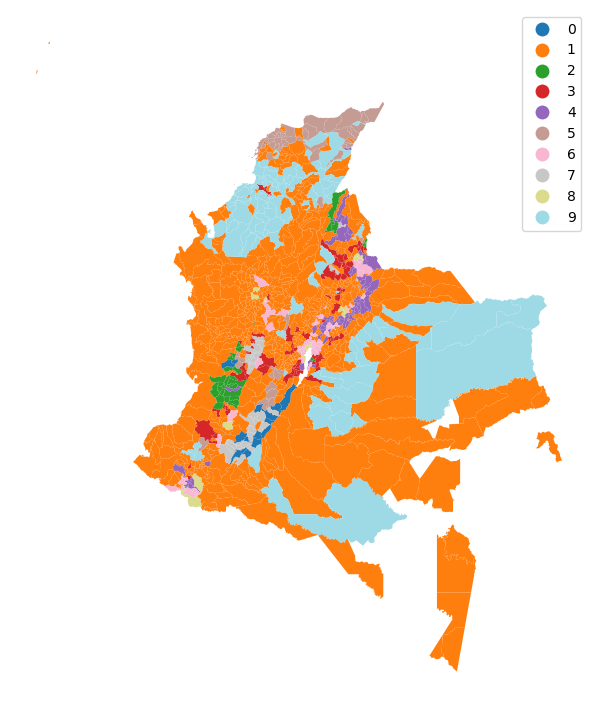

In [25]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
municipios3.plot(
    column="k10cls", categorical=True, legend=True, cmap='tab20',linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [26]:
evaluaciones

,CÓD. \nDEP.,NOMBRE_DEPARTAMENTO,CODIGO_MUNICIPIO,NOMBRE_MUNICIPIO,GRUPO_CULTIVO,SUBGRUPO_CULTIVO,NOMBRE_CULTIVO,REGION_SISTEMA,ANIO,PERIODO,AREA_SIEMBRA_HA,AREA_COSECHA_HA,PRODUCCION_TONELADAS,RENDIMIENTO_TONELADAS_HA,ESTADO_PRODUCCION,NOMBRE_CIENTIFICO,CICLO_CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2.0,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82.0,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2.0,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3.0,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1.0,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20.0,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2.0,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15.0,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6.0,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO


In [27]:
municipios3

,geometry,CODIGO_MUNICIPIO,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,AHUYAMA,...,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME,k10cls
0,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351...",5001,0,0,0,0,0,12,0,0,...,0,0,0,0,0,12,24,0,0,8
1,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026...",5002,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,1
2,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877...",5004,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469...",5021,0,0,0,0,0,4,0,0,...,0,0,0,0,0,10,0,0,0,1
4,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216...",5030,0,0,0,0,0,10,0,0,...,0,0,0,0,0,12,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,"POLYGON ((-69.42882 -1.07654, -69.42842 -1.074...",97666,0,0,0,0,0,0,0,0,...,2,0,1,0,0,10,0,0,2,1
1100,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6...",99001,0,0,0,0,0,0,0,11,...,0,0,0,0,0,12,0,0,0,9
1101,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472...",99524,0,0,0,0,0,5,0,7,...,0,0,0,0,0,15,0,0,0,9
1102,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669...",99624,0,0,0,0,0,0,0,16,...,0,0,0,0,0,12,0,0,0,9


In [30]:
from sklearn.preprocessing import LabelEncoder

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
evaluaciones3 = pd.merge(evaluaciones,municipios3[['CODIGO_MUNICIPIO','k10cls']],on='CODIGO_MUNICIPIO', how='left')
evaluaciones3=evaluaciones3.dropna(subset='RENDIMIENTO_TONELADAS_HA')
evaluaciones3['RENDIMIENTO_TONELADAS_HA'] = evaluaciones3[evaluaciones3['RENDIMIENTO_TONELADAS_HA'] < 25]['RENDIMIENTO_TONELADAS_HA']
evaluaciones3=evaluaciones3.dropna(subset='RENDIMIENTO_TONELADAS_HA')
evaluaciones3=evaluaciones3.dropna(subset='ANIO')
evaluaciones3=evaluaciones3.dropna(subset='NOMBRE_CULTIVO')
evaluaciones3=evaluaciones3.dropna(subset='k10cls')
Y=evaluaciones3['RENDIMIENTO_TONELADAS_HA']
X=evaluaciones3[['ANIO','NOMBRE_CULTIVO','k10cls']]
X = X.replace(',','', regex=True)
# Create arrary of categorial variables to be encoded
categorical_cols = ['NOMBRE_CULTIVO']
le = LabelEncoder()
# apply label encoder on categorical feature columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=13
)

In [34]:
evaluaciones3

,CÓD. \nDEP.,NOMBRE_DEPARTAMENTO,CODIGO_MUNICIPIO,NOMBRE_MUNICIPIO,GRUPO_CULTIVO,SUBGRUPO_CULTIVO,NOMBRE_CULTIVO,REGION_SISTEMA,ANIO,PERIODO,AREA_SIEMBRA_HA,AREA_COSECHA_HA,PRODUCCION_TONELADAS,RENDIMIENTO_TONELADAS_HA,ESTADO_PRODUCCION,NOMBRE_CIENTIFICO,CICLO_CULTIVO,k10cls
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2.0,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,4.0
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82.0,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,8.0
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2.0,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,8.0
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3.0,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,2.0
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1.0,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20.0,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO,1.0
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2.0,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO,3.0
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15.0,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO,1.0
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6.0,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO,3.0


In [17]:
municipios.dtypes#tipos de datos geográficos

DPTOMPIO        object
DPTO_CCDGO      object
MPIO_CCDGO      object
MPIO_CNMBR      object
MPIO_CCNCT      object
geometry      geometry
dtype: object

In [18]:
#municipios.explore('DPTO_CCDGO', cmap='Set1')#Municipios agrupados por departamento

In [1]:
pip install mlflow

  Obtaining dependency information for mlflow from https://files.pythonhosted.org/packages/64/4a/514286f441cade293efcdf77c9733d4ea3d50cd67e8b444beca1b9d85572/mlflow-2.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for databricks-cli<1,>=0.8.7 from https://files.pythonhosted.org/packages/ae/a3/d56f8382c40899301f327d1c881278b09c9b8bc301c2c111633a0346d06e/databricks_cli-0.18.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<5,>=3.12.0 from https://files.pythonhosted.org/packages/72/eb/a07cc36ed9b119062886935a8371da8a977dda30b19cf57fe9162589b6f7/protobuf-4.25.0-cp310-abi3-win_amd64.whl.metadata
     ---------------------------------------- 0.0/41.2 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.2 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 41.2/41.2 kB 672.7 kB/s eta 0:00:00
  Obtaining dependency information for alembic!=1.10.0,<2 from https://files.pythonhosted.org/packages/34/47/95d8f99c9f4a5

In [2]:
mlflow server -h 0.0.0.0 -p 8055

SyntaxError: invalid syntax (2890064605.py, line 1)